# Skill Trending

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()
import ast
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill:ast.literal_eval(skill) if pd.notna(skill) else skill )


In [6]:
df_DA_US = df[(df['job_title_short']=='Data Analyst')&(df['job_country']== 'United States')].copy()

In [7]:
df_DA_US['job_posted_month'] = df_DA_US['job_posted_date'].dt.month

In [8]:
df_DA_US_explode = df_DA_US.explode('job_skills')


In [10]:
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month',columns='job_skills', aggfunc='size', fill_value=0)

In [11]:
df_DA_US_pivot.loc['total'] = df_DA_US_pivot.sum()

In [14]:
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['total'].sort_values(ascending=False).index]

In [15]:
df_DA_US_pivot = df_DA_US_pivot.drop('total')

In [19]:
DA_totals = df_DA_US.groupby('job_posted_month').size()

In [36]:
df_DA_US_percent = df_DA_US_pivot.div(DA_totals/100, axis=0)

In [37]:
df_DA_US_percent = df_DA_US_percent.reset_index()

In [45]:
df_DA_US_percent['job_posted_month_no'] = df_DA_US_percent['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

In [46]:
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month_no')

In [52]:
df_DA_US_percent


job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
Feb,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
May,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028
Jun,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.017596,0.000000,0.000000,0.017596,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


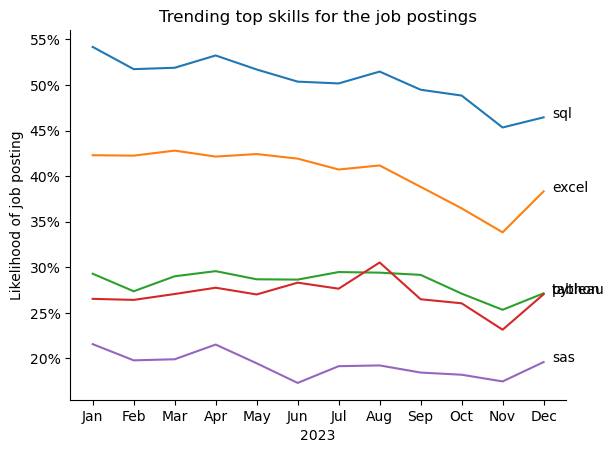

In [63]:
df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.despine()
plt.title('Trending top skills for the job postings')
plt.ylabel('Likelihood of job posting')
plt.xlabel('2023')
plt.legend().remove()
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
      plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])



plt.show()